In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap
import matplotlib.colors

### Define Color Map

In [2]:
# 'tab20' colormap, converting to hex and optionally removing a specific color
tab20_cmap = get_cmap('tab20')
colors_hex_list_20 = [matplotlib.colors.to_hex(c) for c in tab20_cmap.colors]
# remove a specific color, make sure it's in the list before removing
colors_hex_list_20.remove('#d62728')
colors_hex_list_20.remove('#ff9896')
colors_hex_list_20.remove('#7f7f7f')
colors_hex_list_20.remove('#c7c7c7')
# for color_hex in colors_hex_list_20:
#     print(color_hex)

# 'tab10' colormap, converting to hex and optionally removing a specific color
tab10_cmap = get_cmap('tab10')
colors_hex_list_10 = [matplotlib.colors.to_hex(c) for c in tab10_cmap.colors]
# remove a specific color, make sure it's in the list before removing
colors_hex_list_10.remove('#d62728')
colors_hex_list_10.remove('#7f7f7f')
# for color_hex in colors_hex_list_10:
#     print(color_hex)

/tmp/ipykernel_2898005/1671679249.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab20_cmap = get_cmap('tab20')
/tmp/ipykernel_2898005/1671679249.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10_cmap = get_cmap('tab10')


### Define Function

In [3]:
def draw_and_save(left_csv, right_csv, title_left, title_right, output_png, color_selection,
                  min_f1_1, max_f1_1, num_f1_1, min_f1_2, max_f1_2, num_f1_2):

    # load data
    df1 = pd.read_csv(left_csv)
    df2 = pd.read_csv(right_csv)

    df1['Precision'] = df1['Precision'] / 100
    df1['Recall'] = df1['Recall'] / 100
    df1 = df1.iloc[df1.apply(custom_sort, axis=1).argsort()]

    df2['Precision'] = df2['Precision'] / 100
    df2['Recall'] = df2['Recall'] / 100
    df2 = df2.iloc[df2.apply(custom_sort, axis=1).argsort()]
    
    # combine unique model names from both datasets
    combined_names = pd.concat([df1['Name'], df2['Name']]).unique().tolist()

    # set marker size
    marker_size = 80
    new_marker_size = 120

    color_map_updated = {new_matcher: new_matcher_color}
    # loop through combined_names to assign colors from colors_hex_list_20, except for "Agent-OM"
    for i, name in enumerate(combined_names):
        if name != new_matcher:  # Skip "Agent-OM" since it's already assigned
            if color_selection == "tab10":
                color_map_updated[name] = colors_hex_list_10[i-1 % len(colors_hex_list_10)]
            if color_selection == "tab20":
                color_map_updated[name] = colors_hex_list_20[i-1 % len(colors_hex_list_20)]

    # create the plot with updated color map
    fig, axs = plt.subplots(1, 2, figsize=(7, 3))

    # turn off the grid
    axs[0].grid(False)
    axs[1].grid(False)

    # set specific values for x-axis and y-axis ticks
    tick_values = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
    for ax in axs:
        ax.set_xticks(tick_values)
        ax.set_yticks(tick_values)

    # adjust font size for x-axis and y-axis labels
    for ax in axs:
        ax.tick_params(axis='x', labelsize=10)  # Adjust x-axis label font size
        ax.tick_params(axis='y', labelsize=10)  # Adjust y-axis label font size

    # adjust the spacing between the subplots
    fig.subplots_adjust(wspace=0.3)  # Increase the space between subplots
    # adjust the subplot parameters to give some space for the legends
    plt.subplots_adjust(top=0.75)

    # initialize the zorder value
    initial_zorder = 50

    for name, group in df1.groupby('Name'):
        if name == new_matcher:
            axs[0].scatter(group['Recall'], group['Precision'], label=name, color='#D62728',
                           s=new_marker_size, marker='*', zorder=99)
        else:
            axs[0].scatter(group['Recall'], group['Precision'], label=name, color=color_map_updated[name],
                      s=marker_size, marker='^', zorder=initial_zorder)
            initial_zorder -= 1
        # calculate and plot the iso-F1 curves
        f1_levels = np.linspace(0.1, max_f1_1, num=num_f1_1)
        for f1 in f1_levels:
            x = np.linspace(0.001, 1, 1000)
            y = f1 * x / (2 * x - f1)
            valid_idx = np.where(y >= 0)  # valid indices where y is non-negative
            axs[0].plot(x[valid_idx], y[valid_idx], color='grey', alpha=1, linestyle='--', zorder=1)
            axs[0].annotate('F1={0:0.2f}'.format(f1), xy=(x[-10], y[-10]), textcoords="offset points", 
                            xytext=(25, -3), ha='center')

    axs[0].set_title(title_left)
    axs[0].set_xlim([min_f1_1, 1])
    axs[0].set_ylim([min_f1_1, 1.1])
    axs[0].set_xlabel('Recall', fontsize=10)
    axs[0].set_ylabel('Precision', fontsize=10)

    # initialize the zorder value
    initial_zorder = 50

    for name, group in df2.groupby('Name'):
        if name == new_matcher:
            axs[1].scatter(group['Recall'], group['Precision'], label=name, color='#D62728',
                           s=new_marker_size, marker='*', zorder=99)
        else:
            axs[1].scatter(group['Recall'], group['Precision'], label=name, color=color_map_updated[name],
                      s=marker_size, marker='^', zorder=initial_zorder)
            initial_zorder -= 1
        # calculate and plot the iso-F1 curves
        f1_levels = np.linspace(0.1, max_f1_2, num=num_f1_2)
        for f1 in f1_levels:
            x = np.linspace(0.001, 1, 1000)
            y = f1 * x / (2 * x - f1)
            valid_idx = np.where(y >= 0)  # valid indices where y is non-negative
            axs[1].plot(x[valid_idx], y[valid_idx], color='grey', alpha=1, linestyle='--', zorder=1)
            axs[1].annotate('F1={0:0.2f}'.format(f1), xy=(x[-10], y[-10]), textcoords="offset points", 
                            xytext=(25, -3), ha='center')

    axs[1].set_title(title_right)
    axs[1].set_xlim([min_f1_2, 1])
    axs[1].set_ylim([min_f1_2, 1.1])
    axs[1].set_xlabel('Recall', fontsize=10)
    axs[1].set_ylabel('Precision', fontsize=10)

    # axs[0].set_ylabel('Scores')
    # for ax in axs:
    #     ax.set_xlabel('Metrics')
    #     ax.grid(True)

    # create custom handles for the unified legend with colors
    # handle the first name separately with marker="*"
    handles = [plt.Line2D([0], [0], marker='*', linestyle='None', markersize=10, label=combined_names[0], color=color_map_updated[combined_names[0]])]
    # handle the rest of the names with marker="^"
    handles += [plt.Line2D([0], [0], marker='^', linestyle='None', markersize=10, label=name, color=color_map_updated[name]) for name in combined_names[1:]]
    
    # handles = [plt.Line2D([0], [0], marker='^', linestyle='None', markersize=10, label=name, 
    #            color=color_map_updated[name]) for name in combined_names]

    # add the legend
    # create a legend for 'Agent-OM', aligned to the left above the figure
    legend_a = fig.legend(handles=[handles[0]], loc='upper left', bbox_to_anchor=(0.02, 0.05), ncol=1, frameon=False)
    # create a second legend for the rest, aligned to the right above the figure
    fig.legend(handles=handles[1:], loc='upper left', bbox_to_anchor=(0.2, 0.05), 
               ncol=4, frameon=True, labelspacing=0.5, columnspacing=0.5)
    # fig.legend(handles, combined_names, loc='upper center', bbox_to_anchor=(0.5, 0.05), 
    #            ncol=5, frameon=False, labelspacing=0.5, columnspacing=0.5)

    # adjust the plot
    plt.tight_layout()
    # save the plot
    plt.savefig(output_png, bbox_inches='tight', pad_inches=0.1)
    # show the plot
    plt.show()

In [4]:
def custom_sort(row):
    name = row['Name'].lower()
    if name == new_matcher.lower():  # 'A' and 'a' will both be matched
        return ('',)  # tuples are sorted lexicographically, an empty string comes before anything
    else:
        return (name,)

In [5]:
# set new matcher
new_matcher = "Agent-OM"
new_matcher_color = "#d62728"

### OAEI Conference Track

/tmp/ipykernel_2898005/1920247626.py:70: RuntimeWarning: divide by zero encountered in divide
  y = f1 * x / (2 * x - f1)
/tmp/ipykernel_2898005/1920247626.py:97: RuntimeWarning: divide by zero encountered in divide
  y = f1 * x / (2 * x - f1)


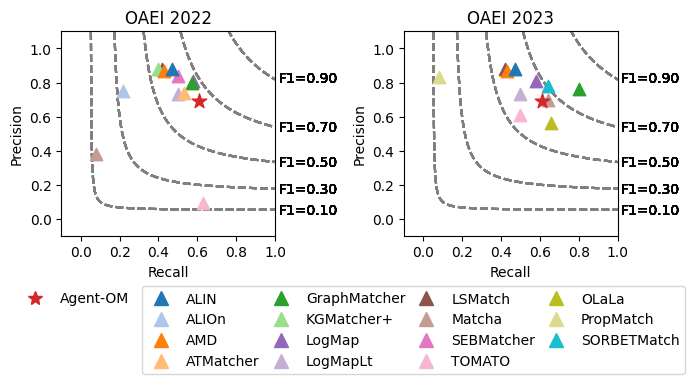

In [6]:
draw_and_save("benchmark_2022/conference/conference_benchmark.csv", "benchmark_2023/conference/conference_benchmark.csv",
              "OAEI 2022", "OAEI 2023", "result_figure/conference.png", "tab20", 
              -0.1, 0.9, 5, -0.1, 0.9, 5)

### OAEI Anatomy Track

/tmp/ipykernel_2898005/1920247626.py:70: RuntimeWarning: divide by zero encountered in divide
  y = f1 * x / (2 * x - f1)
/tmp/ipykernel_2898005/1920247626.py:97: RuntimeWarning: divide by zero encountered in divide
  y = f1 * x / (2 * x - f1)


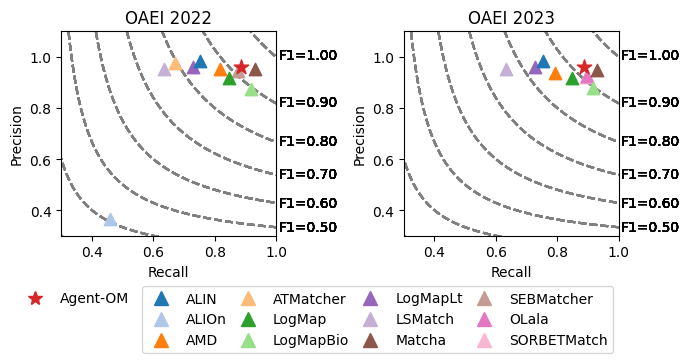

In [7]:
draw_and_save("benchmark_2022/anatomy/result.csv", "benchmark_2023/anatomy/result.csv",
              "OAEI 2022", "OAEI 2023", "result_figure/anatomy.png", "tab20", 
              0.3, 1.0, 10, 0.3, 1.0, 10)

/tmp/ipykernel_2898005/1920247626.py:70: RuntimeWarning: divide by zero encountered in divide
  y = f1 * x / (2 * x - f1)
/tmp/ipykernel_2898005/1920247626.py:97: RuntimeWarning: divide by zero encountered in divide
  y = f1 * x / (2 * x - f1)


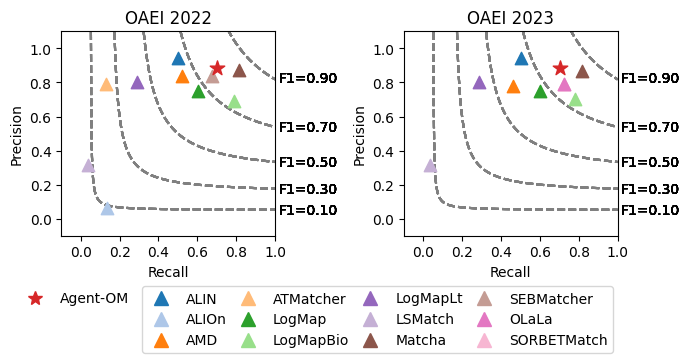

In [8]:
draw_and_save("benchmark_2022/anatomy/result_filter.csv", "benchmark_2023/anatomy/result_filter.csv",
              "OAEI 2022", "OAEI 2023", "result_figure/anatomy-filter.png", "tab20", 
              -0.1, 0.9, 5, -0.1, 0.9, 5)

### OAEI MSE Track

/tmp/ipykernel_2898005/1920247626.py:70: RuntimeWarning: divide by zero encountered in divide
  y = f1 * x / (2 * x - f1)
/tmp/ipykernel_2898005/1920247626.py:97: RuntimeWarning: divide by zero encountered in divide
  y = f1 * x / (2 * x - f1)


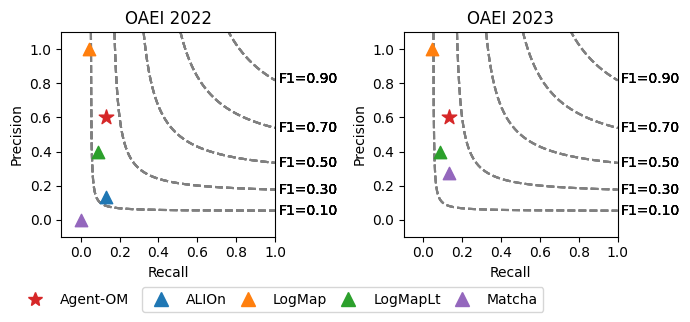

In [9]:
draw_and_save("benchmark_2022/mse/firstTestCase/result.csv", "benchmark_2023/mse/firstTestCase/result.csv",
              "OAEI 2022", "OAEI 2023", "result_figure/mse-1.png", "tab10", 
              -0.1, 0.9, 5, -0.1, 0.9, 5)

/tmp/ipykernel_2898005/1920247626.py:70: RuntimeWarning: divide by zero encountered in divide
  y = f1 * x / (2 * x - f1)
/tmp/ipykernel_2898005/1920247626.py:97: RuntimeWarning: divide by zero encountered in divide
  y = f1 * x / (2 * x - f1)


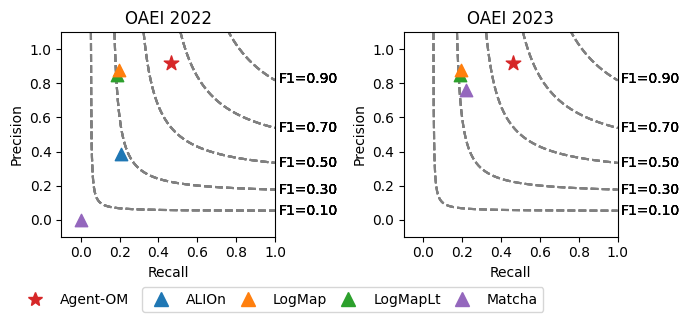

In [10]:
draw_and_save("benchmark_2022/mse/secondTestCase/result.csv", "benchmark_2023/mse/secondTestCase/result.csv",
              "OAEI 2022", "OAEI 2023", "result_figure/mse-2.png", "tab10", 
              -0.1, 0.9, 5, -0.1, 0.9, 5)

/tmp/ipykernel_2898005/1920247626.py:70: RuntimeWarning: divide by zero encountered in divide
  y = f1 * x / (2 * x - f1)
/tmp/ipykernel_2898005/1920247626.py:97: RuntimeWarning: divide by zero encountered in divide
  y = f1 * x / (2 * x - f1)


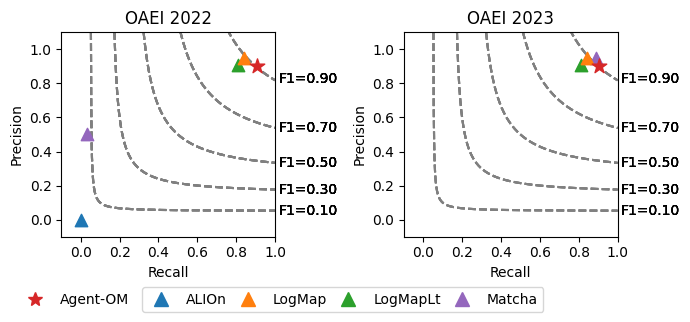

In [11]:
draw_and_save("benchmark_2022/mse/thirdTestCase/result.csv", "benchmark_2023/mse/thirdTestCase/result.csv",
              "OAEI 2022", "OAEI 2023", "result_figure/mse-3.png", "tab10", 
              -0.1, 0.9, 5, -0.1, 0.9, 5)